# Classical Baseline : Satellite Task Scheduling
This notebook finds the optimal classical schedule for satellite task under:
- Energy budget constraints(5 units)
- Task Priorities (high,medium ,low)
- Visibility window constraints(W1,W2,W3)

It serve as a benchmarks  for later QAOA -based quantum scheduling

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

## Task Definition
Each task has : 
- Energy cost
- Priority (high=3, medium =2,low=1)
- visibility Window

Task Table( from problem formulator.md  Day1 Folder)
| Task | Description | Energy | Priority | Window |
|------|-------------|--------|----------|--------|
| T1   | High-res Earth Imaging | 2 | High | W1 |
| T2   | Ground data Communication | 1 | Medium | W1 |
| T3  | Weather sensing operation | 3 | High | W2 |
| T4  | Scientific Experiment | 3 | low | W3 |

In [ ]:
energy=np.array([2,1,3,3])
priority=np.array([3,2,3,1])
windows=np.array(['W1','W1','W2','W3'])

ENERGY_BUDGET=5 # Maximum energy units allow per window


## Cost Function
The cost function balances energy and priority:

cost = Total Energy - $ \alpha $ * Total Priority

- Only tasks in the current visibility window are considered
- Any schedules exceeding the energy budget is consider invalid (cost =inf)

In [10]:
#----------------------------------------------------------------------------------------------
# Cost Function
#---------------------------------------------------------------------------------------------
def compute_cost(selection,energy,priority,windows ,energy_budget=5,current_window='W1'):
    """
    compute the costof given schedule  selection vector.
    Panalize schedules exceeding energy budget or not visible in the current window.
    """
    total_energy=0
    total_priority=0
    for i, x  in enumerate(selection):
        if i>= len(energy) or i>=len(priority) or i>=len(windows):
            raise IndexError(f"Index{i} out of range!")
        if x==1:
            # Check if task is visible current window
            if windows[i]!= current_window:
                return float('inf')  # Invalied if not visible
            total_energy += energy[i]
            total_priority += priority[i]
            # Check Energy Budget
            if total_energy > energy_budget:
                return float('inf') # Invalid id exceed the budget
    return  -total_priority
    


## Brute Force Scheduler
 we enumerate  all possible 0/1 tasks combination and find the one with **minimum cost**.

In [11]:
#-----------------------------------------------------------------------------------------------------------
# Brute Force Scheduler
#-----------------------------------------------------------------------------------------------------------
def find_optimal_schedule(energy,priority,windows,current_window='W1'):
    num_tasks=len(energy)
    best_cost=float('inf')
    best_solution = None

    # Generate all possible  0/1  combination for tasks
    for selection in itertools.product([0,1],repeat=num_tasks):
        cost=compute_cost(selection,energy,priority,windows,current_window=current_window)
        if cost < best_cost:
            best_cost=cost
            best_solution= selection

    if best_solution is None:
            best_solution=tuple([0]*num_tasks)
            best_cost=float('inf')

    return best_solution,best_cost


## Find optimal Schedule for each visibility window 
we check each window seperatly: W1 , W2 ,W3

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# Run Sheduler for each window
#-----------------------------------------------------------------------------------------------------------
window = ['W1','W2','W3']
for w in window:
    solution, cost = find_optimal_schedule(energy,priority,windows,current_window=w)
    #print("solution type:", type(solution))
    #print("solution length:", len(solution))
    #print("energy length type:", len(energy))
    selected=np.array(solution,dtype=int)
    print(f"\n Window {w}: Solution={solution},Cost={cost}")
    for i ,s in enumerate(solution):
        if i >= len(energy):
            print(f"Skipping index{i}")
            continue
        if s==1:
            print(f"Task T{i+1}:Energy={energy[i]},Priority={priority[i]}")
    
    


 Window W1: Solution=(1, 1, 0, 0),Cost=-5
Task T1:Energy=2,Priority=3
Task T2:Energy=1,Priority=2

 Window W2: Solution=(0, 0, 1, 0),Cost=-3
Task T3:Energy=3,Priority=3

 Window W3: Solution=(0, 0, 0, 1),Cost=-1
Task T4:Energy=3,Priority=1


## Visualization Example 
we plot the enrgy vs priority for slected tasks in window for clarity.

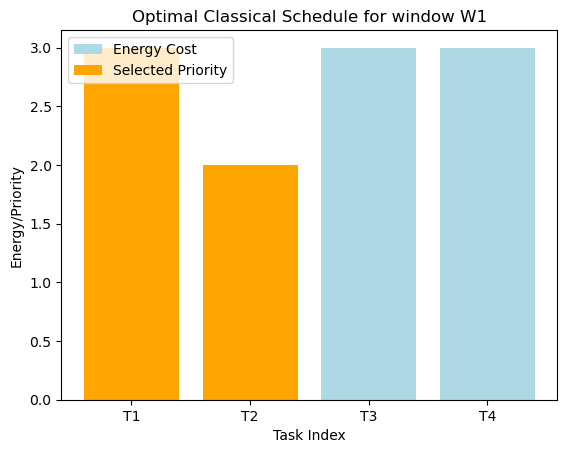

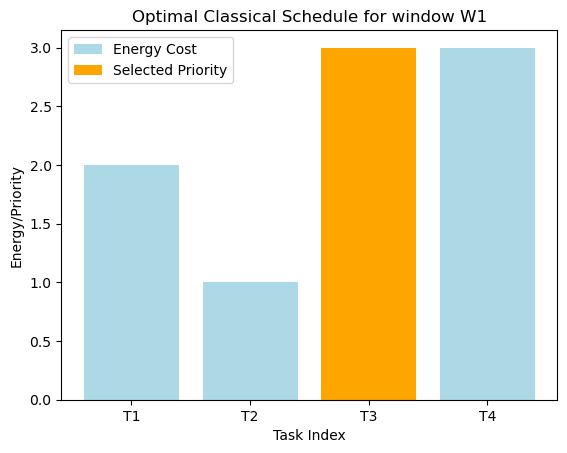

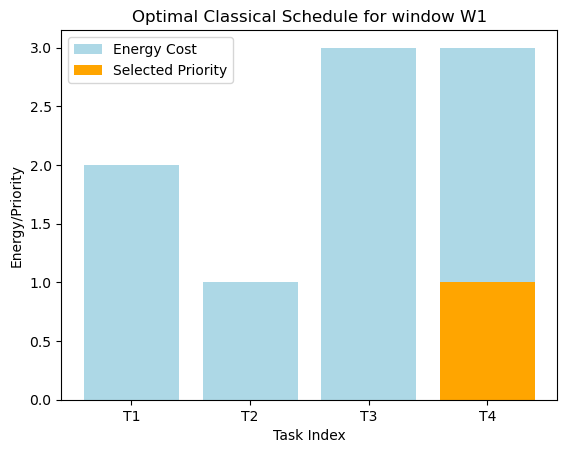

In [14]:
visibility_window=['W1','W2','W3']
for w in visibility_window:
    solution,cost=find_optimal_schedule(energy,priority,windows,current_window=w)
    selected=np.array(solution,dtype=int)
    task_indices=np.arange(len(energy))
    plt.bar(task_indices,energy,color='lightblue',label='Energy Cost')
    plt.bar(task_indices,selected*priority,color='orange',label='Selected Priority')
    plt.xlabel('Task Index')
    plt.ylabel('Energy/Priority')
    plt.title(f'Optimal Classical Schedule for window {w}')
    plt.xticks(task_indices,[f"T{i+1}" for i in task_indices])
    plt.legend()
    plt.show()

## Interpretation of graph result
- Blue bars =Energy Cost
    - show the energy required by each task
    - these bars do not change across windows
- Orange bars -Selected task priority
    - Appear only for tasks chooosen by the schedular
    - change per visibility window
    - represent the objective being maximized(priority)
- Why blue bar still appear
    - Blue bar show available task
    - orange bar show selected task
    - this make comparision clear and intuitive.


This notebook  now contains a **complete classical baseline**
- Task definition from your problem table
- Enrgy budget and visibility constraint 
- Brute force optimal schedular
-  Beginner friendly expectaion for presentation

**Author** : Shreya Sunil Palase

**Repository**: Quantum-Computing-coding(codeQubit)

**Project** : QAOA Based Energy Efficient Satellite task Scheduling under Orbital Visibility Constraint

**file** : classical_baseline.ipynb(Day2)

**Date created**: 31-December-2025

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>